In [20]:
from urllib import request

url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]

import re # Import for regular expressions 


def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

dumas[10000:10500]
type(dumas)  

str

# Wordclouds : Visualiser les mots les plus fréquents dans un corpus

In [3]:
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt

img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))


def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(
        background_color="white",
        max_words=2000,
        mask=book_mask,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc


wordcloud_dumas = make_wordcloud(dumas)

(-0.5, 1429.5, 783.5, -0.5)

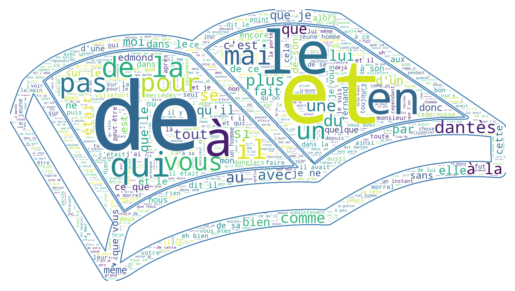

In [5]:
plt.imshow(wordcloud_dumas, interpolation="bilinear")
plt.axis("off")

## Obervations
On voit très clairement sur le wordcloud que les mots les plus fréquent sont ce que l'on appelle des `stopword` (de , le , et, qui, vous, à, etc.). Ces mots arrivent même à prendre le pas sur le mot `Dantès` qui est le protagoniste du livre. 

# Installation de NLTK et des dépendances nécessaire au projet

In [8]:
import nltk

nltk.download("punkt") #Il peut être nécessaire d'installer certains packages additionnelels en plus de NTLK. Ici, on télécharge les données de ponctuations.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pault\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokénisation des mots

In [9]:
words = nltk.word_tokenize(dumas, language="french")
words[1030:1050]

['que',
 'voulez-vous',
 ',',
 'monsieur',
 'edmond',
 ',',
 'reprit',
 "l'armateur",
 'qui',
 'paraissait',
 'se',
 'consoler',
 'de',
 'plus',
 'en',
 'plus',
 ',',
 'nous',
 'sommes',
 'tous']

## Observations
Les mots avec apostrophes sont considérés comme 1 (ce qui peut avoir du sens au niveau statistique mais si cela n'en a aucun d'un point de vue grammatical). Deplus, on peut voir que certaines ponctuations ont été tokénisés. Pour enlever la ponctuation, on utilise la méthode `isalpha()`

# Suppression des éléments de ponctuation
Pour enlever la ponctuation, on utilise la méthode `isalpha()`

In [11]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['assez',
 'sombre',
 'obséquieux',
 'envers',
 'ses',
 'supérieurs',
 'insolent',
 'envers',
 'ses',
 'subordonnés',
 'aussi',
 'outre',
 'son',
 'titre',
 'comptable',
 'qui',
 'est',
 'toujours',
 'un',
 'motif']

# Retirer les stopwords


In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pault\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords

print(f"Liste de stopwords en français {stopwords.words('french')}")

stop_words = set(stopwords.words('french'))

words = [word for word in words if not word in stop_words]
words[1030:1050]

Liste de stopwords en français ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 

['celui',
 'dantès',
 'a',
 'déposé',
 'passant',
 'comment',
 'paquet',
 'déposer',
 'danglars',
 'rougit',
 'passais',
 'devant',
 'porte',
 'capitaine',
 'entrouverte',
 'vu',
 'remettre',
 'paquet',
 'cette',
 'lettre']

(-0.5, 1429.5, 783.5, -0.5)

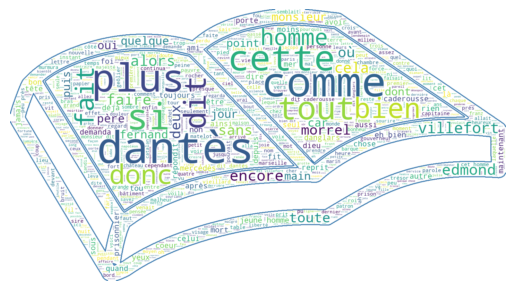

In [23]:
wc = make_wordcloud(" ".join(words)) # Pour transformer la liste en str sans qu'il n'y ai de guillemets

fig = plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Stemming
![](image/lemmatization_vs_stemming.png) <br>

Deux approches de stemming :

    - La lemmatisation : A partir de la connaissance des statuts grammaticaux (par exemple que le pluriel de cheval est chevaux)
    - Le stemming : Regrouper de nombreuses variantes de mot comme un seule et même mot. Par exemple, "chat" et "chats" deviennent un même mot avec le stemming.
  
  

In [24]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="french")

stemmed = [stemmer.stem(word) for word in words]
print(stemmed[1030:1050])

['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']


In [25]:
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
stemmed = [stemmer.stem(word) for word in words]
print(stemmed[1030:1050])

['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']
